## This project is specifically focused on removing the outliers from dataset

**We have time series dataset of National Stock Exchange**

form this dataset I will take the turnover feature and remove the outliers from this frature coulmn


## 1.Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2.Preparing the data frame from National Stock Exchange(nifty) dataset

In [27]:
df = pd.read_csv('datasets_432988_822622_nifty_it_index.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Turnover
0,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
1,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10
3,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10
4,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10


## 3. Data Visualization

**3.1 Creating Pairplot from datframe to observe the correlations between features and data distribution**

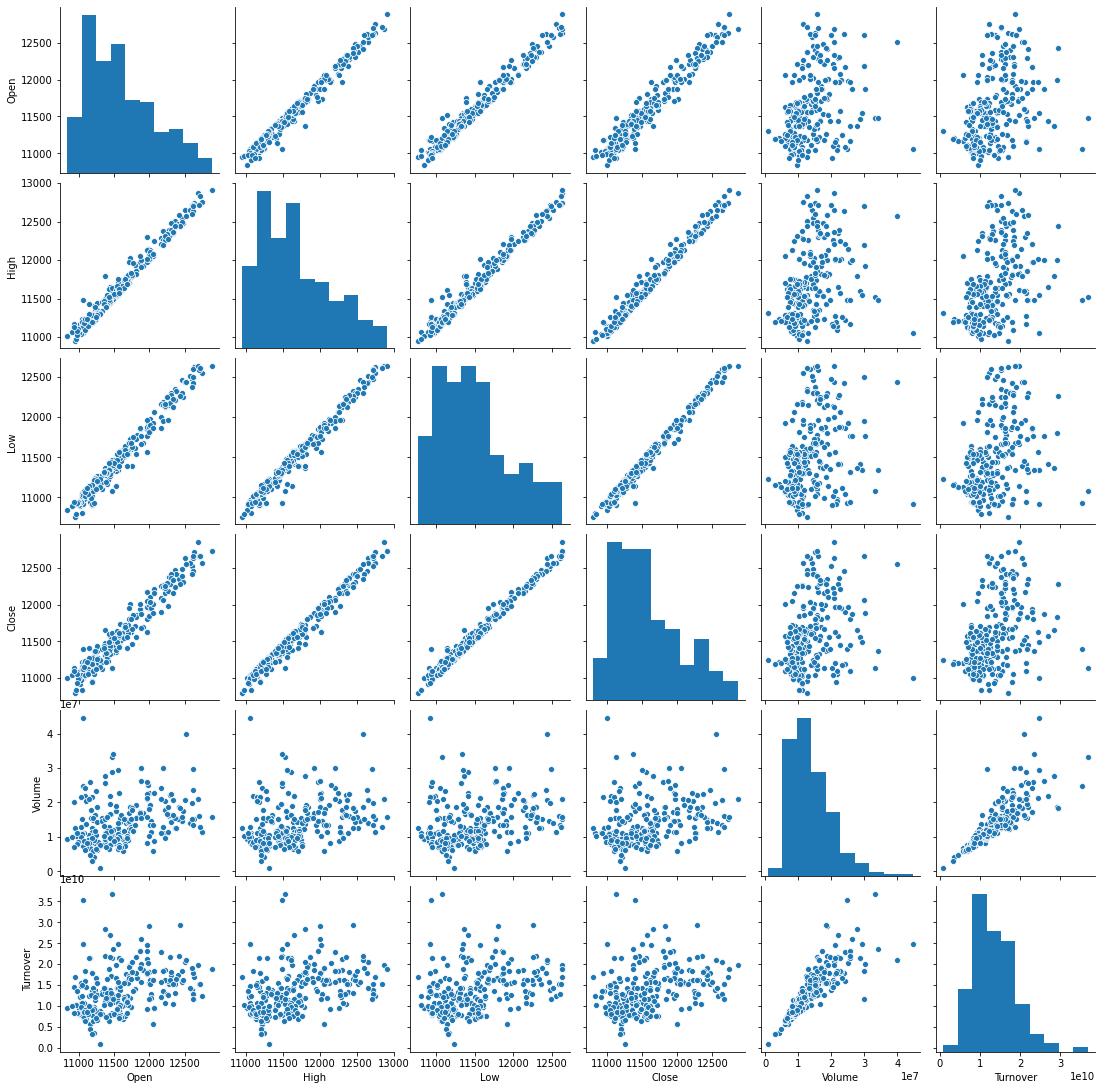

In [28]:
sns.pairplot(df,palette='coolwarm')

**from this plot we can observe some outliers in Turnover dataset**  

**3.2 Plotting histogram of Turnover**

<function matplotlib.pyplot.show(close=None, block=None)>

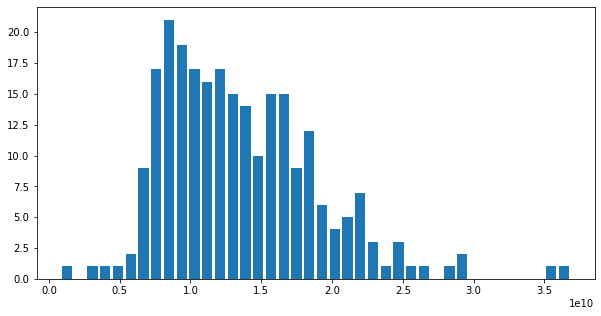

In [34]:
plt.figure(figsize=(10,5))
plt.hist(df['Turnover'],bins=40,rwidth=0.8)
plt.show

**3.3 Taking the statistical overview of Turnover coulmn**


In [6]:
df.Turnover.describe()

count    2.480000e+02
mean     1.354940e+10
std      5.461539e+09
min      8.272000e+08
25%      9.438500e+09
50%      1.259385e+10
75%      1.657345e+10
max      3.685160e+10
Name: Turnover, dtype: float64

## 4. Finding Zscore to remove the outliers

**4.1 Calculating Zscore** 

Now to remove the outliers above 2 standard deviation, calculate Z score

**Zscore = datapoint value(Height)-mean of height column / standard deviation of Height coulmn**


In [29]:
df['Zscore']= (df.Turnover - df.Turnover.mean())/df.Turnover.std()
df.head()

,Date,Open,High,Low,Close,Volume,Turnover,Zscore
0,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,-1.826280
1,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,-0.714780
2,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,-0.541862
3,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,0.017504
4,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,-0.277394


**4.2 Observing the outliers above 2 Standard Deviation**


In [30]:
df[(df.Zscore>2)|(df.Zscore<-2)]

,Date,Open,High,Low,Close,Volume,Turnover,Zscore
6,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,3.994259
20,2015-01-30,11998.35,12003.35,11799.35,11824.75,18559078,2.905950e+10,2.839877
52,2015-03-18,12434.25,12448.45,12256.55,12276.10,18361292,2.939150e+10,2.900666
74,2015-04-22,11552.50,11552.50,11345.10,11492.00,29316560,2.475390e+10,2.051528
76,2015-04-24,11474.40,11523.00,11077.30,11132.25,33250761,3.685160e+10,4.266599
80,2015-04-30,11056.50,11056.50,10916.65,11001.05,44619697,2.474250e+10,2.049441
100,2015-05-29,11443.10,11647.05,11411.15,11575.05,21994515,2.683790e+10,2.433105
137,2015-07-21,11366.60,11798.20,11366.60,11655.45,27720978,2.837600e+10,2.714729
187,2015-10-01,11877.85,11998.70,11769.50,11867.85,26288267,2.590680e+10,2.262622
214,2015-11-11,11305.20,11312.30,11230.40,11249.70,795240,8.272000e+08,-2.329416


**4.3 Removing above outliers and prepare new dataframe with 2 Standard deviation of Turnover Feature**  

In [52]:
final_df= df[(df.Zscore<2)&(df.Zscore>-2)]
print(df.shape,final_df.shape)

(248, 8) (238, 8)


**4.4 Plotting histogram of Turnover feature with final dataframe**

<function matplotlib.pyplot.show(close=None, block=None)>

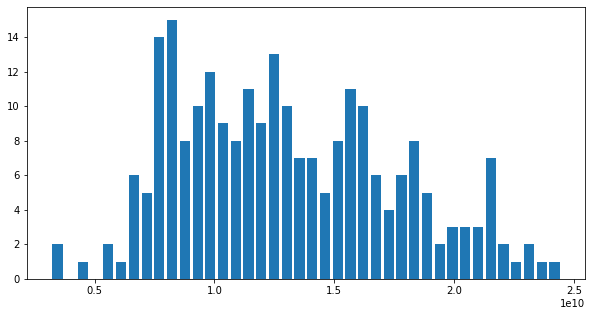

In [53]:
plt.figure(figsize=(10,5))
plt.hist(final_df['Turnover'],bins=40,rwidth=0.8)
plt.show

In [54]:
final_df.Turnover.describe()

count    2.380000e+02
mean     1.301739e+10
std      4.513480e+09
min      3.182700e+09
25%      9.308825e+09
50%      1.246400e+10
75%      1.618345e+10
max      2.445630e+10
Name: Turnover, dtype: float64

**Observing the difference between two histograms**

Text(0.5, 1.0, 'Data after processing')

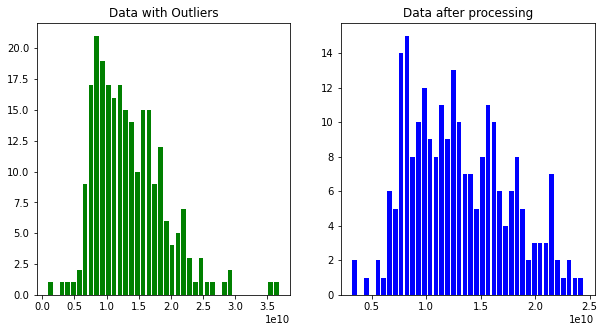

In [51]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(df['Turnover'],bins=40,rwidth=0.8,color='g')
plt.title('Data with Outliers')


plt.subplot(1,2,2)
plt.hist(final_df['Turnover'],bins=40,rwidth=0.8,color='b')
plt.title('Data after processing')


